In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import plotly.graph_objects as go

In [2]:
# Load the Iris dataset
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# Extract features and target variable
X = iris.data
y = iris.target

# Redefine the target variable into two classes: 'virginica' and 'non-virginica'
y_binary = np.where(y == 2, 'virginica', 'non-virginica')

# Create a DataFrame
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y_binary


In [4]:
#creating the separate dataframe for each target variable
virginica_data = iris_df[iris_df['target'] == 'virginica']
non_virginica_data = iris_df[iris_df['target'] == 'non-virginica']

# statistics for each variable
virginica_stats = virginica_data.describe()
non_virginica_stats = non_virginica_data.describe()

# Display the tables
print("Descriptive Statistics for Virginica Class:")
print(virginica_stats)

print("\nDescriptive Statistics for Non-Virginica Class:")
print(non_virginica_stats)

Descriptive Statistics for Virginica Class:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             6.58800          2.974000           5.552000   
std              0.63588          0.322497           0.551895   
min              4.90000          2.200000           4.500000   
25%              6.22500          2.800000           5.100000   
50%              6.50000          3.000000           5.550000   
75%              6.90000          3.175000           5.875000   
max              7.90000          3.800000           6.900000   

       petal width (cm)  
count          50.00000  
mean            2.02600  
std             0.27465  
min             1.40000  
25%             1.80000  
50%             2.00000  
75%             2.30000  
max             2.50000  

Descriptive Statistics for Non-Virginica Class:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         100.0000

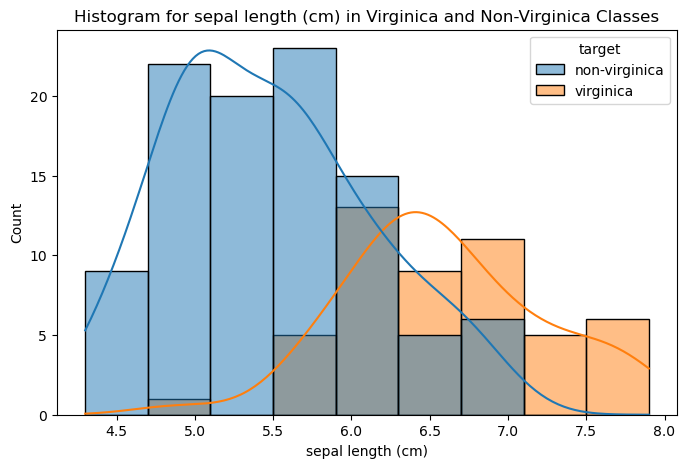

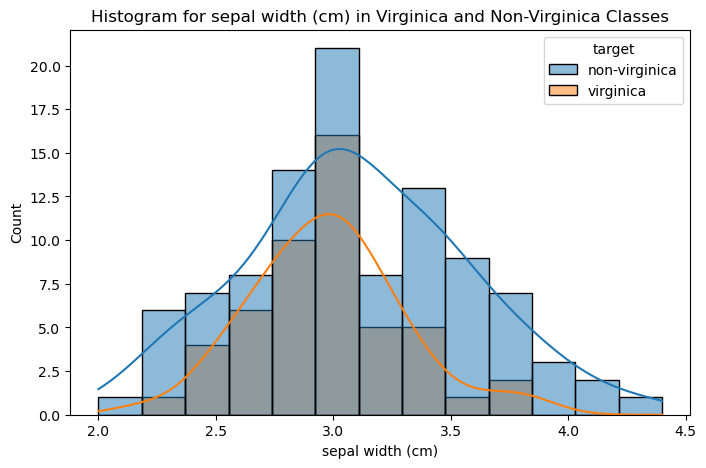

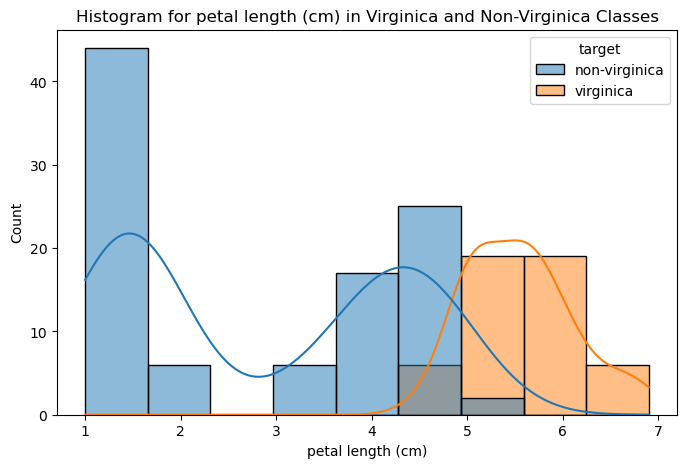

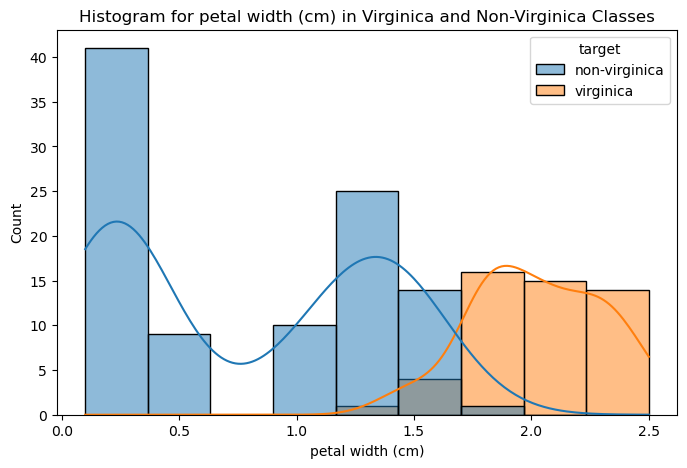

In [5]:
# Plot histograms for each feature
for feature in iris.feature_names:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=iris_df, x=feature, hue='target', kde=True)
    plt.title(f'Histogram for {feature} in Virginica and Non-Virginica Classes')
    plt.show()

In each graph, the histograms allow you to observe the spread and concentration of data points for each feature within the "Virginica" and "Non-Virginica" classes.
For Sepal Length, non- virginica is right skewed whereas virginica is left skewed.
For sepal width, non-virginica is approximately normalized in form, whereas the virginica show sign of right skewness.
For Petal length and petal width does not provide a visual answer, which means there are invidence of NaN or null values. 

In [6]:
# Correlation matrix
correlation_matrix = iris_df.corr()
print(correlation_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


C:\Users\techv\AppData\Local\Temp\ipykernel_21548\2453095933.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris_df.corr()


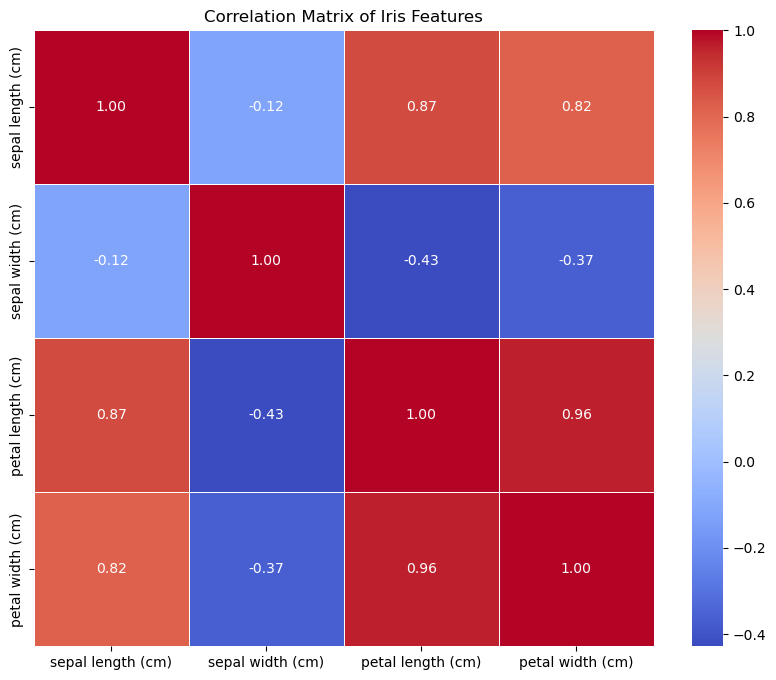

In [7]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Iris Features')
plt.show()

The above graph provides the relationship with respect to features.
For instances:
* Petal length and petal width provides a strong positive relation.
* sepal length and sepal width provides a negative relation.

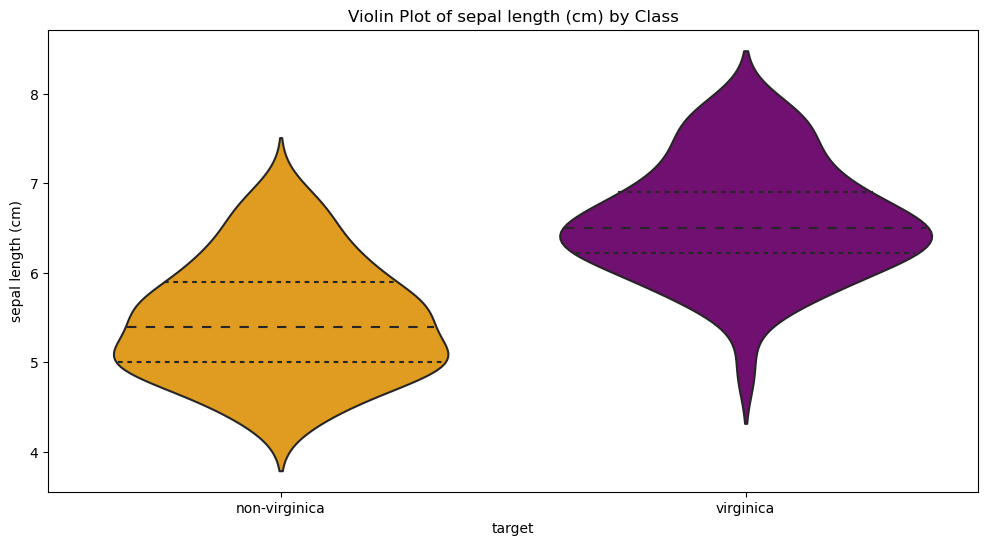

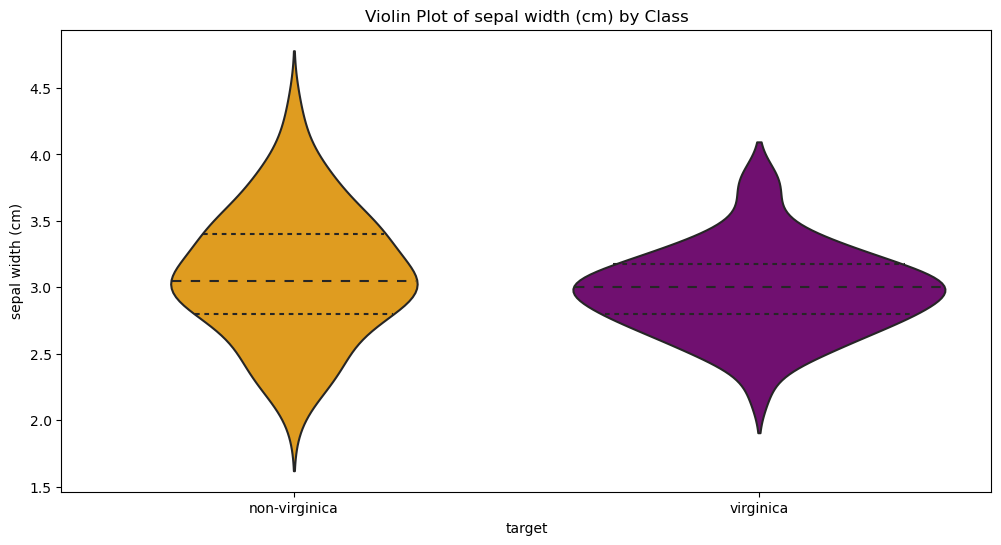

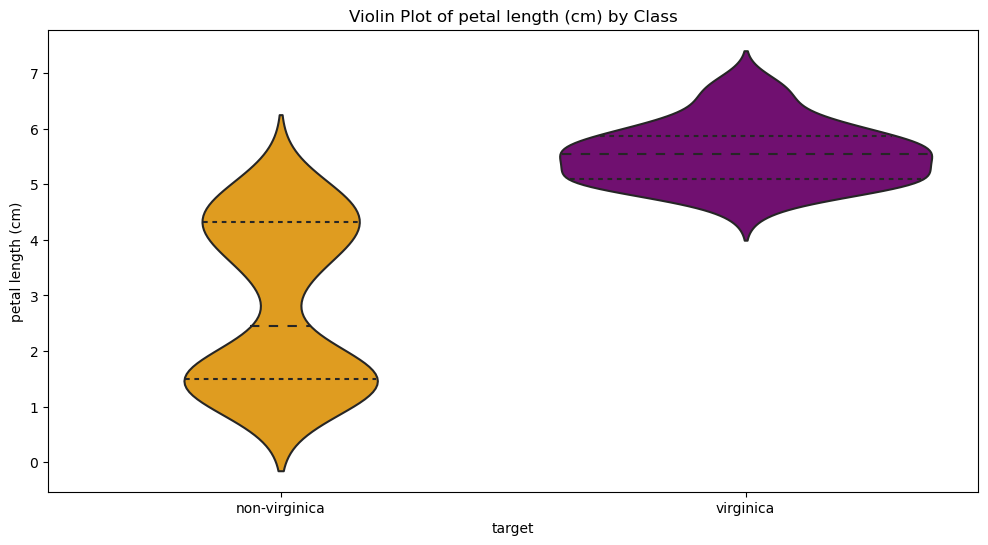

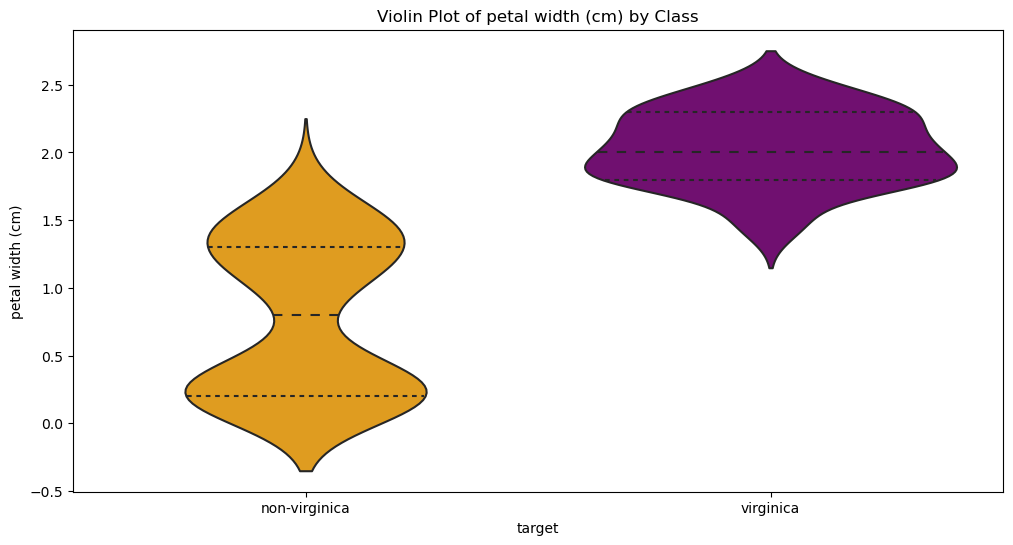

In [8]:
# Violin plots for all features
features = iris.feature_names

for feature in features:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="target", y=feature, data=iris_df, inner="quartile", palette={"virginica": "purple", "non-virginica": "orange"})
    plt.title(f"Violin Plot of {feature} by Class")
    plt.show()


Violin plots are used to visualize the distribution of a numeric variable across different categories. The violin shape represents the probability density of the data at different values.
Wider sections indicate a higher probability density, and narrower sections indicate lower density.


For More Information: [Violin Plot](https://www.kaggle.com/code/yunasheng/violin-plot)

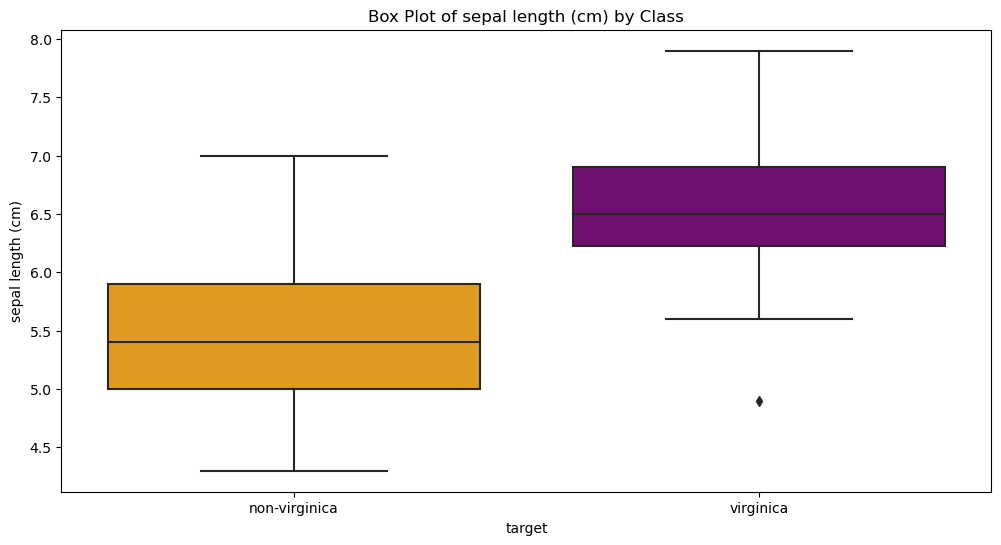

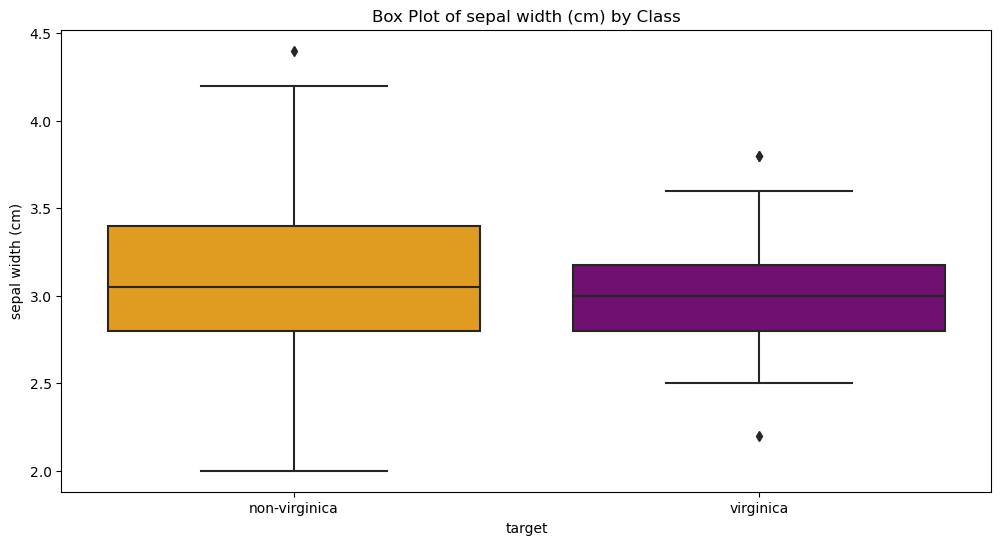

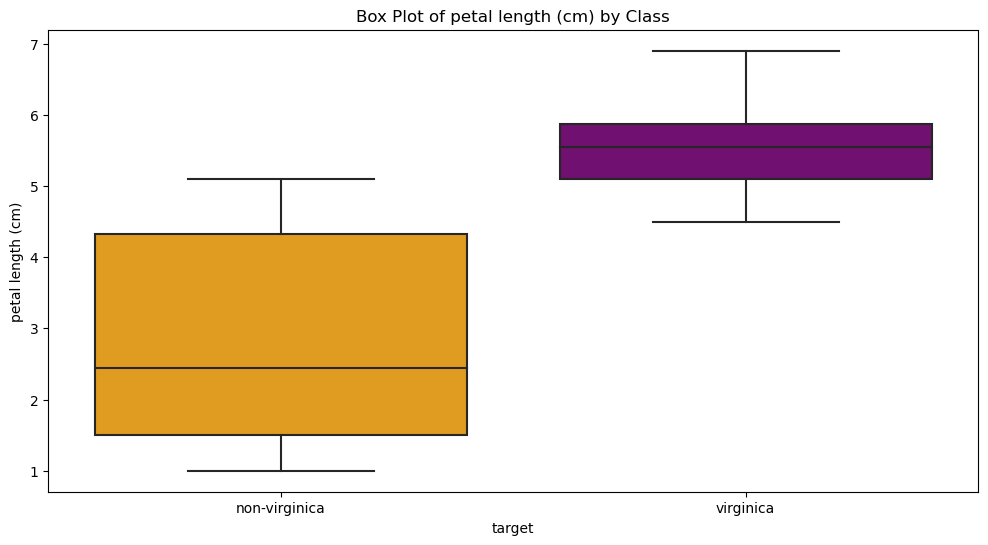

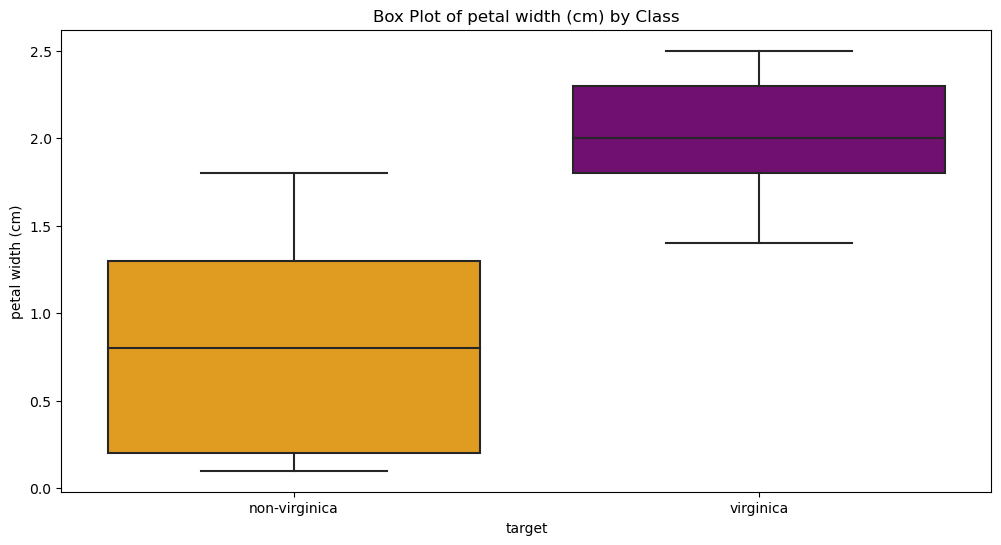

In [9]:
# Plot box plots for each feature with respect to the target variable
for feature in iris.feature_names:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='target', y=feature, data=iris_df, palette={"virginica": "purple", "non-virginica": "orange"})
    plt.title(f'Box Plot of {feature} by Class')
    plt.show()

The above box plots provide a visual representation of the distribution of each feature in the Iris dataset with respect to the target variable, which has two classes: 'virginica' and 'non-virginica'. Points outside the whiskers are considered outliers.
It provides insights, into the central tendency, spread, and potential outliers for each feature, helping to understand the distribution of the data 

For more Information: [Box Plot](https://www.kaggle.com/code/palak98039/python-data-visualizations)

C:\Users\techv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


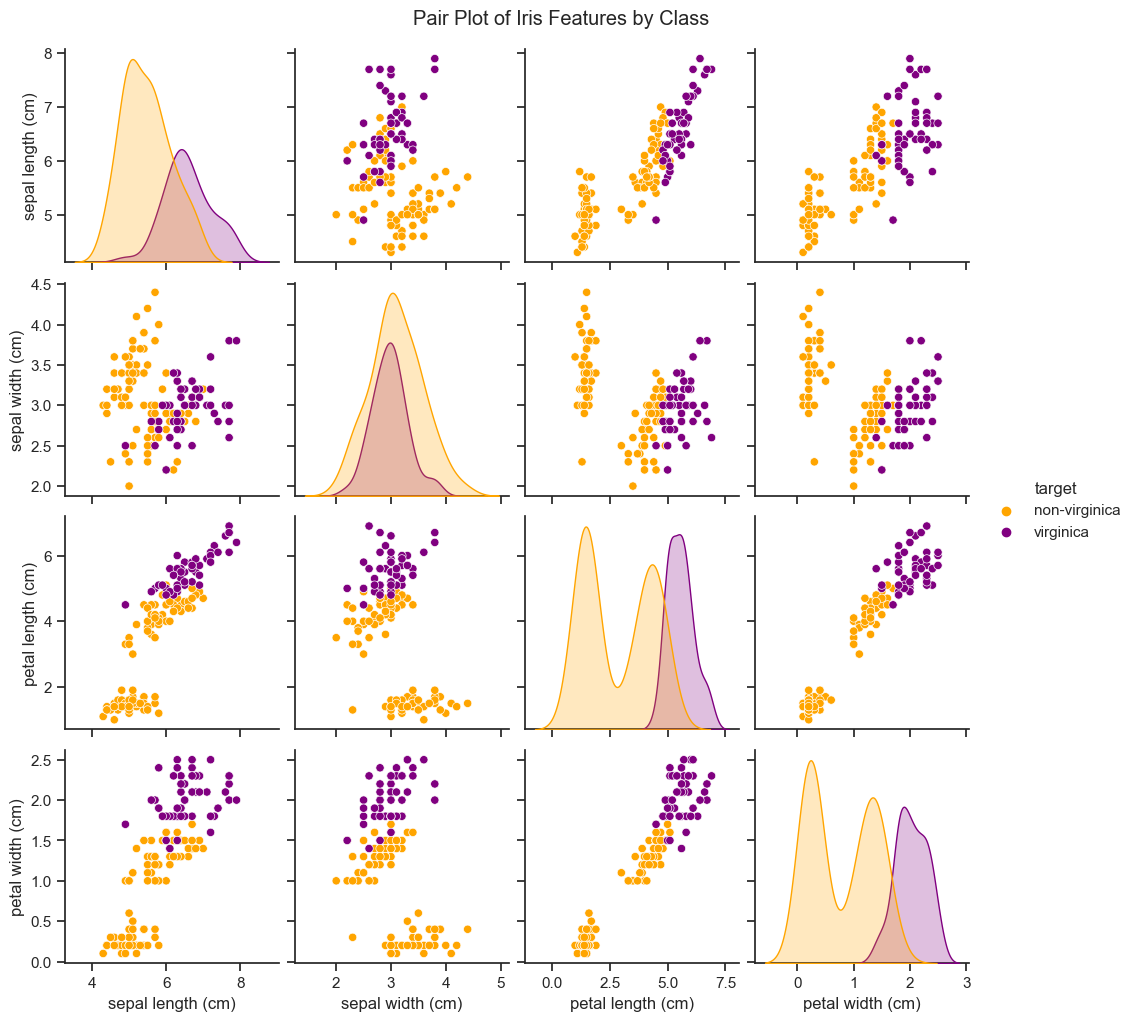

In [10]:
# Pair plot
sns.set(style="ticks")
sns.pairplot(iris_df, hue="target", palette={"virginica": "purple", "non-virginica": "orange"})
plt.suptitle("Pair Plot of Iris Features by Class", y=1.02)
plt.show()

The pair plot provides scatterplots for each pair of features, colored by class ('virginica' or 'non-virginica'). It helps us visualize relationships between different features and observe potential patterns or separations between classes.

For more information: [Pair Plot](https://www.kaggle.com/code/palak98039/python-data-visualizations)

In [11]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_binary, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)


In [12]:
# Function to train logistics regression models
def train(features):
    # Select the specified features
    X_train_subset = X_train[:, features]
    X_val_subset = X_val[:, features]
    X_test_subset = X_test[:, features]

    # Train logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_subset, y_train)

    # Predictions on the validation set
    y_val_pred = model.predict(X_val_subset)

    # Calculate accuracy on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)

    return model, accuracy

In [13]:
# List of feature combinations to try
feature_combinations = [
    [0],  # One by One feature
    [1],  
    [2],  
    [3],  
    [0, 1],  # Two features
    [0, 2],  
    [1, 2],  
    [0, 1, 2],  # Three features
]

In [14]:
# Train for each feature combination
for features in feature_combinations:
    model, accuracy = train(features)
    print(f"Features: {features}, Accuracy: {accuracy:.2f}")

Features: [0], Accuracy: 0.87
Features: [1], Accuracy: 0.60
Features: [2], Accuracy: 1.00
Features: [3], Accuracy: 1.00
Features: [0, 1], Accuracy: 0.93
Features: [0, 2], Accuracy: 1.00
Features: [1, 2], Accuracy: 1.00
Features: [0, 1, 2], Accuracy: 1.00


In [15]:
# Train for each feature combination
for features in feature_combinations:
    model, accuracy = train(features)
    
# Predictions on the validation set
    y_val_pred_prob = model.predict_proba(X_val[:, features])[:, 1]
    y_val_pred = model.predict(X_val[:, features]) 
    
# Create a DataFrame for each model
    result_df = pd.DataFrame({
        'Instance': range(1, len(X_val) + 1),
        'Probability_Virginica': y_val_pred_prob,
        'Predicted': y_val_pred,
        'Ground Truth': y_val
    })
    
# Display the table
    print(f"Table for Features: {features}, Accuracy: {accuracy:.2f}")
    print(result_df)
    
    
#calculate the precision, recall and f1
    precision = precision_score(y_val, y_val_pred, pos_label='virginica', average='binary')
    recall = recall_score(y_val, y_val_pred, pos_label='virginica', average='binary')
    f1_score_value = f1_score(y_val, y_val_pred, pos_label='virginica', average='binary')

# Summarize the data
    precision_classes = precision_score(y_val, y_val_pred, average=None)
    recall_classes = recall_score(y_val, y_val_pred, average=None)
    f1_classes = f1_score(y_val, y_val_pred, average=None)
    
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score_value:.2f}\n")
    
   

Table for Features: [0], Accuracy: 0.87
    Instance  Probability_Virginica      Predicted   Ground Truth
0          1               0.398271  non-virginica      virginica
1          2               0.943719      virginica      virginica
2          3               0.045704  non-virginica  non-virginica
3          4               0.497836  non-virginica      virginica
4          5               0.350992  non-virginica  non-virginica
5          6               0.020901  non-virginica  non-virginica
6          7               0.548189      virginica      virginica
7          8               0.227811  non-virginica  non-virginica
8          9               0.597573      virginica      virginica
9         10               0.066934  non-virginica  non-virginica
10        11               0.227811  non-virginica  non-virginica
11        12               0.037659  non-virginica  non-virginica
12        13               0.769129      virginica      virginica
13        14               0.080708 

C:\Users\techv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\techv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The result are each feature combinations, while providing the accuracy, precision, recall and f1-score for the first 15 insatnces.

In [16]:
# Create subplots for each feature combination
fig = go.Figure()

for features in feature_combinations:
    model, accuracy = train(features)

    if len(features) == 1:
        x1_range = np.linspace(X_val[:, features[0]].min(), X_val[:, features[0]].max(), 100)
        x1, = np.meshgrid(x1_range)
        decision_boundary = -model.intercept_ / model.coef_[0] * x1
        fig.add_trace(go.Scatter(x=x1_range, y=decision_boundary.flatten(), mode='lines', name=f'Decision Boundary ({features})'))
    elif len(features) == 2:
        x1_range = np.linspace(X_val[:, features[0]].min(), X_val[:, features[0]].max(), 100)
        x2_range = np.linspace(X_val[:, features[1]].min(), X_val[:, features[1]].max(), 100)
        x1, x2 = np.meshgrid(x1_range, x2_range)

        if len(features) == 2:
            decision_boundary = - (model.intercept_ + model.coef_[0][0] * x1 + model.coef_[0][1] * x2) / model.coef_[0][1]
        else:
            decision_boundary = - (model.intercept_ + model.coef_[0][0] * x1 + model.coef_[0][1] * x2) / model.coef_[0][2]

        fig.add_trace(go.Surface(x=x1, y=x2, z=decision_boundary, opacity=0.8, colorscale='Viridis', name=f'Decision Boundary ({features})'))

# Plot scatter points for each class
for class_label, color in zip(['non-virginica', 'virginica'], ['blue', 'red']):
    class_indices = (y_val == class_label)
    fig.add_trace(go.Scatter3d(
        x=X_val[class_indices, 0],
        y=X_val[class_indices, 1],
        z=X_val[class_indices, 2],
        mode='markers',
        marker=dict(color=color),
        name=class_label
    ))

# Set layout
fig.update_layout(scene=dict(
    xaxis_title=iris.feature_names[0],
    yaxis_title=iris.feature_names[1],
    zaxis_title=iris.feature_names[2],
))

# Show plot
fig.show()


The surfaces in the plot represent the decision boundaries that separate the two classes ('non-virginica' and 'virginica') based on the logistic regression models.
Blue points belong to the 'non-virginica' class, and red points belong to the 'virginica' class.
In this case, the decision boundaries appear to be fairly well-defined, which suggests that the algorithm is able to accurately classify the Iris flowers based on these two features.

In [17]:
# Train for each feature combination and analyze confusion matrix
for features in feature_combinations:
    model, accuracy = train(features)
    
    # Predictions on the validation set
    y_val_pred = model.predict(X_val[:, features])
    
    # Confusion matrix
    cm = confusion_matrix(y_val, y_val_pred, labels=['non-virginica', 'virginica'])
    
    # Display confusion matrix
    print(f"Confusion Matrix for Features: {features}")
    print(pd.DataFrame(cm, index=['Actual Non-Virginica', 'Actual Virginica'], columns=['Predicted Non-Virginica', 'Predicted Virginica']))
    
    # Analyze failure modes
    false_positives = X_val[(y_val == 'non-virginica') & (y_val_pred == 'virginica')]
    false_negatives = X_val[(y_val == 'virginica') & (y_val_pred == 'non-virginica')]
    
    # Display failure modes
    print(f"False Positives for Features: {features}")
    print(false_positives)
    
    print(f"False Negatives for Features: {features}")
    print(false_negatives)
    print("\n")


Confusion Matrix for Features: [0]
                      Predicted Non-Virginica  Predicted Virginica
Actual Non-Virginica                        9                    0
Actual Virginica                            2                    4
False Positives for Features: [0]
[]
False Negatives for Features: [0]
[[6.1 3.  4.9 1.8]
 [6.3 2.5 5.  1.9]]


Confusion Matrix for Features: [1]
                      Predicted Non-Virginica  Predicted Virginica
Actual Non-Virginica                        9                    0
Actual Virginica                            6                    0
False Positives for Features: [1]
[]
False Negatives for Features: [1]
[[6.1 3.  4.9 1.8]
 [7.7 2.6 6.9 2.3]
 [6.3 2.5 5.  1.9]
 [6.4 2.8 5.6 2.1]
 [6.5 3.2 5.1 2. ]
 [6.9 3.1 5.1 2.3]]


Confusion Matrix for Features: [2]
                      Predicted Non-Virginica  Predicted Virginica
Actual Non-Virginica                        9                    0
Actual Virginica                            0              

* Features 2 and 3 individually, as well as combinations including them ([2], [3], [0, 2], [1, 2], [0, 1, 2]), lead to perfect classification of the validation set (no false negatives or false positives). This suggests that features 2 and 3 are highly informative for distinguishing between "non-virginica" and "virginica" classes.
* Feature 1, either alone or with feature 0, results in more false negatives, indicating it might be less reliable for identifying "virginica" samples.
* Feature 0 doesn't seem to provide significant additional information when combined with features 2 and 3. 


In [18]:
# find the best model based on accuracy
best_model = None
best_accuracy = 0.0
best_features = None #had to reset because features variable retains the last value of the loop

for features in feature_combinations:
    model, accuracy = train(features)
    
    # best model 
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy
        best_features = features

# Display the best model and its accuracy
print(f"Best Model Features: {best_features}, Best Accuracy: {best_accuracy:.2f}")

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test[:, best_features])

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the test set results
print("\nTest Set Results:")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred, labels=['non-virginica', 'virginica'])

# Display confusion matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(pd.DataFrame(cm_test, index=['Actual Non-Virginica', 'Actual Virginica'], columns=['Predicted Non-Virginica', 'Predicted Virginica']))


Best Model Features: [2], Best Accuracy: 1.00

Test Set Results:
Test Set Accuracy: 1.00

Confusion Matrix for Test Set:
                      Predicted Non-Virginica  Predicted Virginica
Actual Non-Virginica                       17                    0
Actual Virginica                            0                    6


The confusion matrix confirms the model's performance:
* All 17 actual "non-virginica" samples were correctly predicted as "non-virginica".
* All 6 actual "virginica" samples were correctly predicted as "virginica"



#### Conclusion:
* Feature 2 provided the best results of all the feature combinations.
* It achieved perfect accuracy (1.00) on both validation and test sets, indicating its strong ability to distinguish between "non-virginica" and "virginica" classes.
* The test set confusion matrix showed no false positives or false negatives, meaning all samples were correctly classified.
